In [2]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

print("Libraries imported successfully.")

Libraries imported successfully.


In [6]:
# load the dataset 
df = pd.read_csv('data/alphabet_stock_data.csv', parse_dates=['Date'])

# set date as index and sort 
df.set_index('Date', inplace=True)
df.sort_index() 

# display the first few rows of the dataframe
print("Data shape:", df.shape)
df.head()

Data shape: (127, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-01,1122.000000,1129.689941,1097.449951,1105.619995,1105.619995,2343100
2020-04-02,1098.260010,1126.859985,1096.400024,1120.839966,1120.839966,1964900
2020-04-03,1119.015015,1123.540039,1079.810059,1097.880005,1097.880005,2313400
2020-04-06,1138.000000,1194.660034,1130.939941,1186.920044,1186.920044,2664700
2020-04-07,1221.000000,1225.000000,1182.229980,1186.510010,1186.510010,2387300


In [7]:
# look at the close price range
print("Close price range:")
print(f"Min Close: ${df['Close'].min():.2f}")
print(f"Max Close: ${df['Close'].max():.2f}")
print(f"Start Close ({df.index[0].date()}): ${df['Close'].iloc[0]:.2f}")
print(f"End Close ({df.index[-1].date()}): ${df['Close'].iloc[-1]:.2f}")

# first and last 3 dates
print("\nFirst 3 dates:")
print(df['Close'].head(3))
print("\nLast 3 dates:")
print(df['Close'].tail(3))

Close price range:
Min Close: $1097.88
Max Close: $1728.28
Start Close (2020-04-01): $1105.62
End Close (2020-09-30): $1469.60

First 3 dates:
Date
2020-04-01    1105.619995
2020-04-02    1120.839966
2020-04-03    1097.880005
Name: Close, dtype: float64

Last 3 dates:
Date
2020-09-28    1464.520020
2020-09-29    1469.329956
2020-09-30    1469.599976
Name: Close, dtype: float64


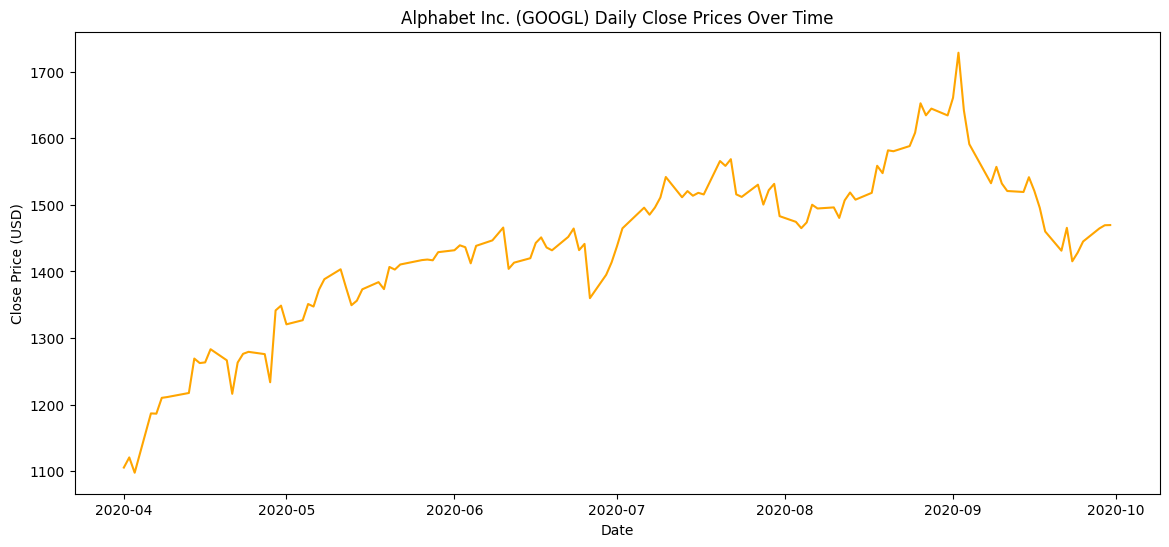

In [21]:
# time series plot of the close prices
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], label='Daily Close Price', color='orange')
plt.title('Alphabet Inc. (GOOGL) Daily Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')

plt.savefig('googl_close_prices.png', dpi=300, bbox_inches='tight')
plt.show()

### Trends
1. We can clearly observe a strong uptrend from April to September. 
2. We can clearly see a pullback in September.

In [22]:
# find approximate percent of significant changes up
start_date = df.index[0]
peak_idx = df['Close'][:110].idxmax() # this is the first 110 days (up to peak close)
peak_date = peak_idx
peak_price = df.loc[peak_idx, 'Close']
start_price = df.loc[start_date, 'Close']

gain_pct = ((peak_price - start_price) / start_price) * 100
print(f"\nFrom {start_date.date()} to {peak_date.date()}, the stock gained approximately {gain_pct:.2f}% uptrend.")

# find approximate percent of significant pullback
pullback_start_price = peak_price
pullback_low_idx = df.loc[peak_date:, 'Close'].idxmin() # from peak to end
pullback_low_date = pullback_low_idx
pullback_low_price = df.loc[pullback_low_idx, 'Close']

decline_pct = ((pullback_start_price - pullback_low_price) / pullback_start_price) * 100
print(f"From {peak_date.date()} to {pullback_low_date.date()}, the stock declined approximately {decline_pct:.2f}% pullback.")


From 2020-04-01 to 2020-09-02, the stock gained approximately 56.32% uptrend.
From 2020-09-02 to 2020-09-23, the stock declined approximately 18.11% pullback.


### (ii) Compute and plot 7-day and 30-day moving averages of Close price

In [ ]:
# Compute 7-day and 30-day moving averages
df['MA7'] = df['Close'].rolling(window=7, min_periods=1).mean()   # min_periods=1 to avoid NaN at start
df['MA30'] = df['Close'].rolling(window=30, min_periods=1).mean() # min_periods=1 to avoid NaN at start

print("\nAdded 7-day and 30-day moving averages to the dataframe.")
print("First 35 rows with moving averages:")
print(df[['Close', 'MA7', 'MA30']].head(35))


Added 7-day and 30-day moving averages to the dataframe.
First 35 rows with moving averages:
                  Close          MA7         MA30
Date                                             
2020-04-01  1105.619995  1105.619995  1105.619995
2020-04-02  1120.839966  1113.229981  1113.229981
2020-04-03  1097.880005  1108.113322  1108.113322
2020-04-06  1186.920044  1127.815002  1127.815002
2020-04-07  1186.510010  1139.554004  1139.554004
2020-04-08  1210.280029  1151.341675  1151.341675
2020-04-09  1211.449951  1159.928571  1159.928571
2020-04-13  1217.560059  1175.920009  1167.132507
2020-04-14  1269.229980  1197.118583  1178.476671
2020-04-15  1262.469971  1220.631435  1186.876001
2020-04-16  1263.469971  1231.567139  1193.839089
2020-04-17  1283.250000  1245.387137  1201.289998
2020-04-20  1266.609985  1253.434274  1206.314613
2020-04-21  1216.339966  1254.132847  1207.030709
2020-04-22  1263.209961  1260.654262  1210.775993
2020-04-23  1276.310059  1261.665702  1214.871872
2020-0

### Plot of the Computed averages

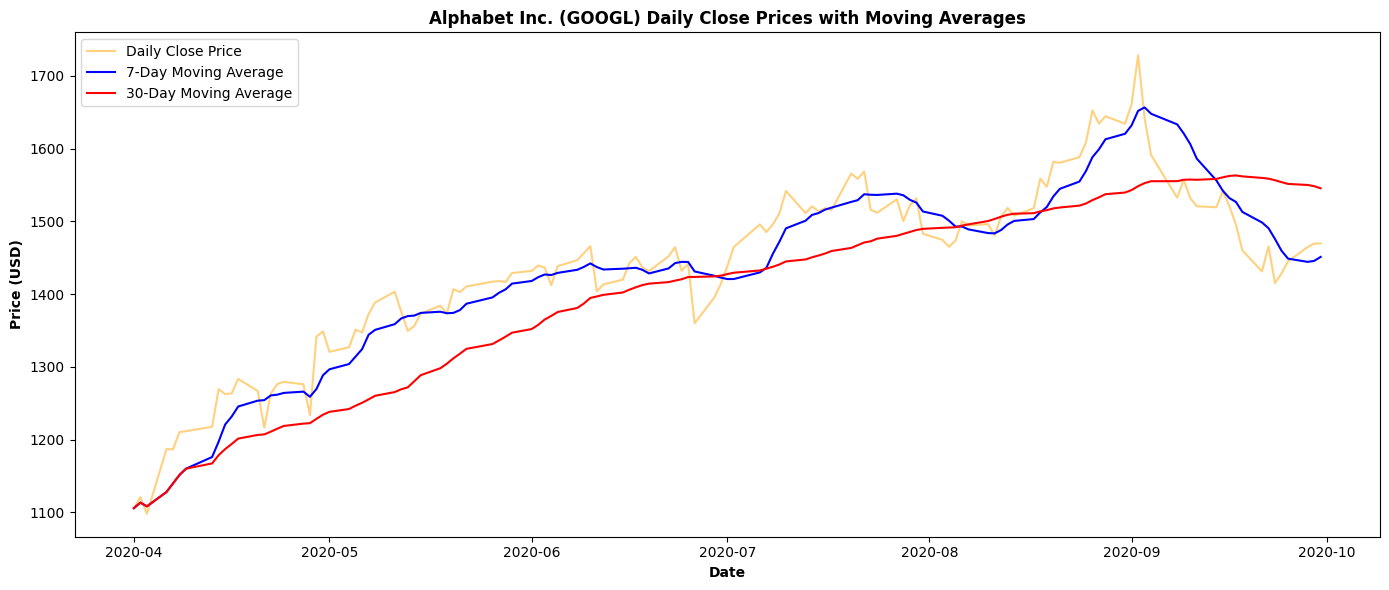

In [34]:
plt.figure(figsize=(14, 6))

# daily close
plt.plot(df.index, df['Close'] , label='Daily Close Price', color='orange', alpha=0.5)

# 7-day moving average
plt.plot(df.index, df['MA7'], label='7-Day Moving Average', color='blue')

# 30-day moving average
plt.plot(df.index, df['MA30'], label='30-Day Moving Average', color='red')

plt.title('Alphabet Inc. (GOOGL) Daily Close Prices with Moving Averages', fontweight='bold')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Price (USD)', fontweight='bold')
plt.legend(loc='upper left')
plt.tight_layout()

plt.savefig('googl_moving_averages.png', dpi=300, bbox_inches='tight')
plt.show()

We can infer from this when the short moving average (7 day) crosses above the long-term moving average, that the recent prices are greater than the older prices (bullish market). The stronger this is the higher the uptrend is. 

Similarly, if the short-average crosses below the long-average it represents the recent prices being less than older prices. This can be seen in September when the stock price dips significantly. 